In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Simulate dataset
def generate_image_data(n_samples=1000, img_size=(32, 32)):
    X = []
    y = []
    for i in range(n_samples):
        if i % 2 == 0:
            img = np.random.normal(loc=0.3, scale=0.2, size=img_size)  # "Cat"
            label = 0
        else:
            img = np.random.normal(loc=0.7, scale=0.2, size=img_size)  # "Dog"
            label = 1
        img = np.clip(img, 0, 1)
        X.append(img.flatten())
        y.append(label)
    return np.array(X), np.array(y)


In [3]:
# Generate data
X, y = generate_image_data()

In [4]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [6]:
# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       103

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



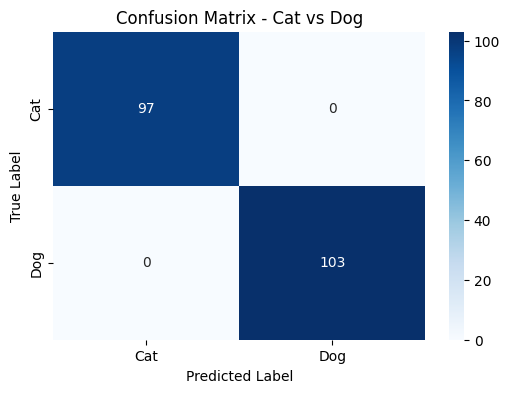

In [7]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Cat', 'Dog']

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Cat vs Dog')
plt.show()